# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('data/movies.csv')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [10]:
df.size

89991

In [11]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [21]:
df.YEAR.fillna('Unknown', inplace=True)
df.GENRE.fillna('Unknown', inplace=True)
med_rat = df.RATING.median()
df.RATING.fillna(med_rat, inplace=True)
df.VOTES.fillna(0, inplace=True)

/var/folders/f_/hf8316d132j76nwh8g854fmm0000gn/T/ipykernel_27137/1097997057.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.RATING.fillna(med_rat, inplace=True)


In [23]:
df.isnull().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64

**1.4 Drop the duplicated rows**

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


**1.5 Replace the columns names to make them all lowercase**

In [31]:
df.rename(str.lower, axis='columns', inplace=True)

In [32]:
df

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [44]:
df_n = df.copy(deep=True)
df_n.votes = df_n.votes.str.replace(',', '')
df_n.votes = df_n.votes.str.replace('.', '')

In [45]:
df_n.votes = df_n.votes.astype(float)

## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [46]:
df_n.rating.mean()

np.float64(6.94608068561873)

**2.2 What is the maximum runtime?**

In [48]:
df_n.runtime.max()

np.float64(853.0)

**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [49]:
df_n[df_n['runtime']== df_n.runtime.max()]

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
1902,El tiempo entre costuras,(2013–2014),"\nAdventure, Drama, History",8.3,\nSira Quiroga is a young Spanish dressmaker e...,"\n \n Stars:\nAdriana Ugarte, \n...",3876.0,853.0,NaN


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

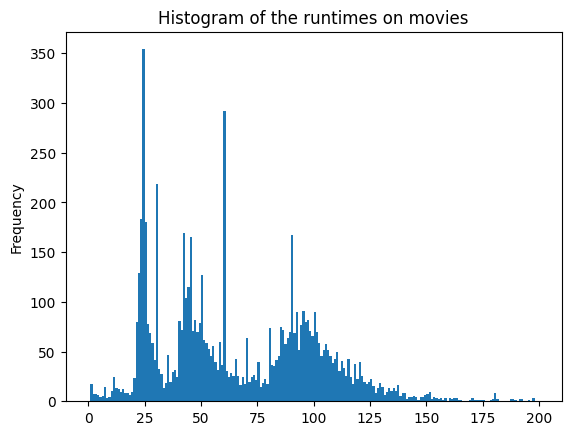

In [51]:
df_n.runtime.plot(kind='hist', title="Histogram of the runtimes on movies", range = (0,200), bins = 200 );

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [53]:
df_n.votes.quantile(0.90)

np.float64(22193.100000000035)

## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [54]:
df_meta = pd.read_csv('data/movies_metadata.csv')

/var/folders/f_/hf8316d132j76nwh8g854fmm0000gn/T/ipykernel_27137/3960015751.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('data/movies_metadata.csv')


In [57]:
df_meta.original_title.nunique()

43373

In [58]:
df_meta.title.nunique()

42277

In [61]:
print(df_meta.title.info())
print(df_meta.original_title.info())

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
45460 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: original_title
Non-Null Count  Dtype 
--------------  ----- 
45466 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB
None


In [62]:
df_n

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [64]:
inner_df_1 = df_meta.merge(df_n, how="inner", left_on= "title", right_on="movies")

In [65]:
inner_df_1

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_count,movies,year,genre,rating,one-line,stars,votes,runtime_y,gross
0,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,141.0,Sabrina,(2018),"\nHorror, Thriller",4.2,\nA toy manufacturer and his wife are terroriz...,\n Director:\nRocky Soraya\n| \n Stars:\...,1583.0,113.0,NaN
1,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,17015,tt0114117,en,Persuasion,This film adaptation of Jane Austen's last nov...,...,36.0,Persuasion,(2022),"\nDrama, Romance",7.1,\nBased on the novel by Jane Austen,\n Director:\nCarrie Cracknell\n| \n Sta...,NaN,NaN,NaN
2,False,NaN,12000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9603,tt0112697,en,Clueless,"Shallow, rich and socially successful Cher is ...",...,828.0,Clueless,(1995),"\nComedy, Romance",6.8,"\nShallow, rich and socially successful Cher i...",\n Director:\nAmy Heckerling\n| \n Stars...,194461.0,97.0,$56.63M
3,False,NaN,1300000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,103,tt0075314,en,Taxi Driver,A mentally unstable Vietnam War veteran works ...,...,2632.0,Taxi Driver,(1976),"\nCrime, Drama",8.2,\nA mentally unstable veteran works as a night...,\n Director:\nMartin Scorsese\n| \n Star...,752553.0,114.0,$28.26M
4,False,NaN,0,[],NaN,124639,tt0114618,en,Target,A subtle yet violent commentary on feudal lords.,...,0.0,Target,(II) (2018),"\nComedy, Thriller",4.0,\nNine people are forced to play a lethal game...,\n Director:\nRaditya Dika\n| \n Stars:\...,443.0,93.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,False,NaN,0,"[{'id': 16, 'name': 'Animation'}]",https://www.pixar.com/lou,433471,tt6267732,en,Lou,A Pixar short about a lost-and-found box and t...,...,17.0,Lou,(I),"\nCrime, Drama, Mystery",7.1,\nA tough elderly woman living on a remote isl...,\n Director:\nAnna Foerster\n| \n Stars:...,NaN,NaN,NaN
1742,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,120831,tt0018107,en,Love,"In Imperial Russia, Anna Karenina falls in lov...",...,5.0,Love,(2016–2018),"\nComedy, Drama, Romance",7.7,\nA program that follows a couple who must nav...,"\n \n Stars:\nGillian Jacobs, \n...",39010.0,50.0,NaN
1743,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,435473,tt5848714,en,American Violence,A psychologist interviews a death row inmate t...,...,12.0,American Violence,(2017),"\nCrime, Drama, Thriller",4.5,"\nFascinated by the causes of violence, Dr. Am...",\n Director:\nTimothy Woodward Jr.\n| \n ...,1727.0,107.0,NaN
1744,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,426272,tt6598626,en,Take Me,Ray is a fledgling entrepreneur who specialize...,...,38.0,Take Me,(2017),"\nComedy, Crime, Mystery",6.1,\nRay is a fledgling entrepreneur who speciali...,\n Director:\nPat Healy\n| \n Stars:\nPa...,5088.0,83.0,$0.00M
